In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
from salishsea_tools import viz_tools
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean.cm as cm

In [37]:
meshmask = xr.open_dataset('/ocean/atall/MOAD/grid/mesh_mask_202310b.nc')
tmask = meshmask.tmask

bathy = nc.Dataset('/ocean/atall/MOAD/grid/bathymetry_202310b.nc')
jetty = nc.Dataset('/ocean/atall/MOAD/grid/jetty_mask_bathy202108.nc')
dsjetty = xr.open_dataset('/ocean/atall/MOAD/grid/jetty_mask_bathy202108.nc')

In [38]:

dsjetty['bfr_coef_u'][328:365,180:215] = dsjetty['bfr_coef_u'][328:365,180:215] + 1*tmask[0,0,328:365,180:215]
dsjetty['bfr_coef_v'][328:365,180:215] = dsjetty['bfr_coef_v'][328:365,180:215] + 1*tmask[0,0,328:365,180:215]


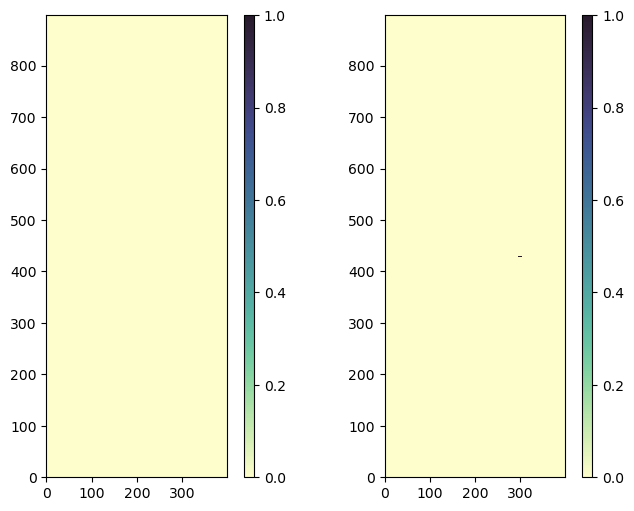

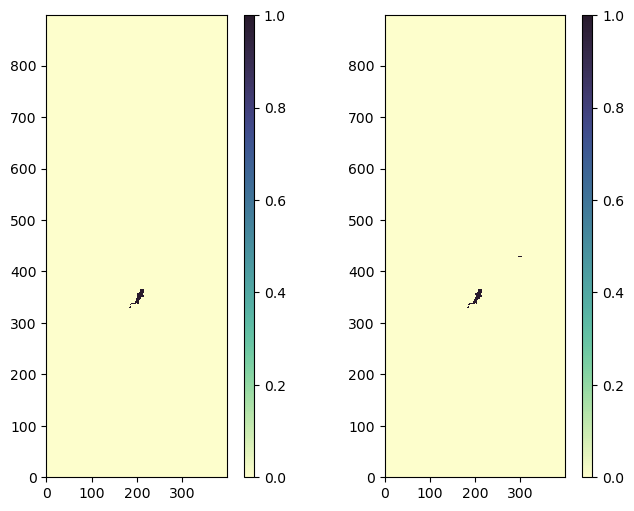

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
mycmap = cm.deep
mycmap.set_bad('grey')
vmin,vmax=(20,250)
im0 = ax[0].pcolormesh(jetty.variables['bfr_coef_u'][:], cmap=mycmap, vmin=0, vmax=1)
im1 = ax[1].pcolormesh(jetty.variables['bfr_coef_v'][:], cmap=mycmap, vmin=0, vmax=1)
viz_tools.set_aspect(ax[0]);
viz_tools.set_aspect(ax[1]);
divider0 = make_axes_locatable(ax[0])
divider1 = make_axes_locatable(ax[1])
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax0, orientation='vertical')
fig.colorbar(im1, cax=cax1, orientation='vertical')

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
mycmap = cm.deep
mycmap.set_bad('grey')
vmin,vmax=(20,250)
im0 = ax[0].pcolormesh(dsjetty['bfr_coef_u'][:], cmap=mycmap, vmin=0, vmax=1)
im1 = ax[1].pcolormesh(dsjetty['bfr_coef_v'][:], cmap=mycmap, vmin=0, vmax=1)
viz_tools.set_aspect(ax[0]);
viz_tools.set_aspect(ax[1]);
divider0 = make_axes_locatable(ax[0])
divider1 = make_axes_locatable(ax[1])
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax0, orientation='vertical')
fig.colorbar(im1, cax=cax1, orientation='vertical')



In [40]:
# save the new jetty file
xr.Dataset.to_netcdf(dsjetty,f'/ocean/atall/MOAD/grid/jetty_mask_bathy202410.nc')